In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
cfgfile = "darknet/cfg/yolov3-tiny-obj-test.cfg"
yolo_weights = "darknet/backup/old_batch.weights"

In [3]:
net = cv2.dnn.readNetFromDarknet(cfgfile,yolo_weights)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

In [4]:
filename = os.listdir("RPS")

In [5]:
index = 15
frame = cv2.imread("RPS/" + filename[index])

In [6]:
frame = cv2.cvtColor(frame, cv2.COLOR_RGBA2RGB)

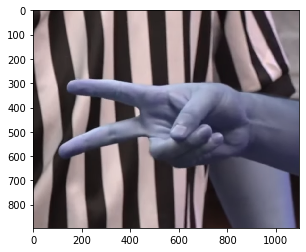

In [7]:
plt.imshow(frame)

In [8]:
blob = cv2.dnn.blobFromImage(frame, 1/255, (416, 416), [0,0,0], 1, crop = False)

In [9]:
blob.shape

(1, 3, 416, 416)

In [10]:
def getOutputsNames(net):
    # Get the names of all the layers in the network
    layersNames = net.getLayerNames()
    # Get the names of the output layers, i.e. the layers with unconnected outputs
    return [layersNames[i[0] - 1] for i in net.getUnconnectedOutLayers()]

In [11]:
getOutputsNames(net)

['yolo_16', 'yolo_23']

In [12]:
net.setInput(blob)
outs = net.forward (getOutputsNames(net))

In [13]:
outs[0].shape,outs[1].shape

((507, 8), (2028, 8))

In [14]:
confThreshold = 0.3
nmsThreshold = 0.5
inpWidth = 416
inpHeight = 416

classes = ["scissors","papers","rock"]

def postprocess(frame_, outs):
    #print (frame,outs)
    frame = frame_.copy()
    frameHeight = frame.shape[0]
    frameWidth = frame.shape[1]

    classIDs = []
    confidences = []
    boxes = []


    

    for out in outs:
        for detection in out:
            
            scores = detection [5:]
            classID = np.argmax(scores)
            confidence = scores[classID]
            
            

            if confidence > confThreshold:
                
                print (confidence)
                centerX = int(detection[0] * frameWidth)
                centerY = int(detection[1] * frameHeight)

                width = int(detection[2]* frameWidth)
                height = int(detection[3]*frameHeight )

                left = int(centerX - width/2)
                top = int(centerY - height/2)

                classIDs.append(classID)
                confidences.append(float(confidence))
                boxes.append([left, top, width, height])

    indices = cv2.dnn.NMSBoxes(boxes,confidences, confThreshold, nmsThreshold )

    for i in indices:
        i = i[0]
        box = boxes[i]
        left = box[0]
        top = box[1]
        width = box[2]
        height = box[3]
        #print (classIDs[i], confidences[i], left, top, left + width, top + height)
        
        a = drawPred(classIDs[i], confidences[i], left, top, left + width, top + height)
    try:
        f,ax = plt.subplots(figsize = (10,10))
        plt.imshow(a)
        plt.show()
    except:
        print ("Confidence too high")
        
def drawPred(classId, conf, left, top, right, bottom):
    # Draw a bounding box.
    #print (classId, conf, left, top, right, bottom)
    
    
    cv2.rectangle(frame, (left, top), (right, bottom), (255, 178, 50), 3)

    label = '%.2f' % conf

    # Get the label for the class name and its confidence
    if classes:
        assert (classId < len(classes))
        label = '%s:%s' % (classes[classId], label)
    cv2.putText(frame, label, (left,top), cv2.FONT_HERSHEY_SIMPLEX, 5, (255, 0, 255), 5)
    return frame



0.6759086


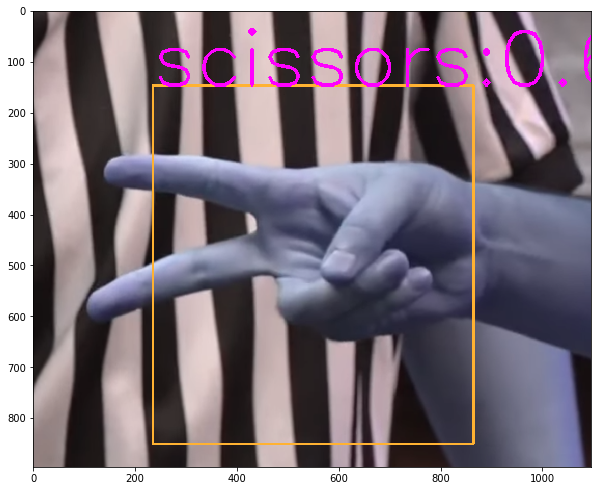

In [15]:
postprocess(frame, outs)